In [0]:
# 타자 데이터 전처리

import pandas as pd
import numpy as np 

In [0]:
bat_10 = pd.read_csv('../MLB_data/2010_bat.csv')
bat_10.head()

,Player,Team,Pos,Age,G,AB,R,H,2B,3B,...,CS,BB,SO,SH,SF,HBP,AVG,OBP,SLG,OPS
0,Ichiro Suzuki,SEA,OF,46,162,680,74,214,30,3,...,9,45,86,3,1,3,0.315,0.359,0.394,0.753
1,Derek Jeter,NYY,SS,45,157,663,111,179,30,3,...,5,63,106,1,3,9,0.270,0.340,0.370,0.710
2,Michael Young,TEX,3B,43,157,656,99,186,36,3,...,2,50,115,0,11,1,0.284,0.330,0.444,0.774
3,Juan Pierre,CWS,OF,42,160,651,96,179,18,3,...,18,45,47,15,2,21,0.275,0.341,0.316,0.657
4,Rickie Weeks,MIL,DH,37,160,651,112,175,32,4,...,4,76,184,0,2,25,0.269,0.366,0.464,0.830


In [0]:
bat_10.shape

(671, 23)

In [0]:
bat_10.isnull().sum()

Player    0
Team      0
Pos       0
Age       0
G         0
AB        0
R         0
H         0
2B        0
3B        0
HR        0
RBI       0
SB        0
CS        0
BB        0
SO        0
SH        0
SF        0
HBP       0
AVG       0
OBP       0
SLG       0
OPS       0
dtype: int64

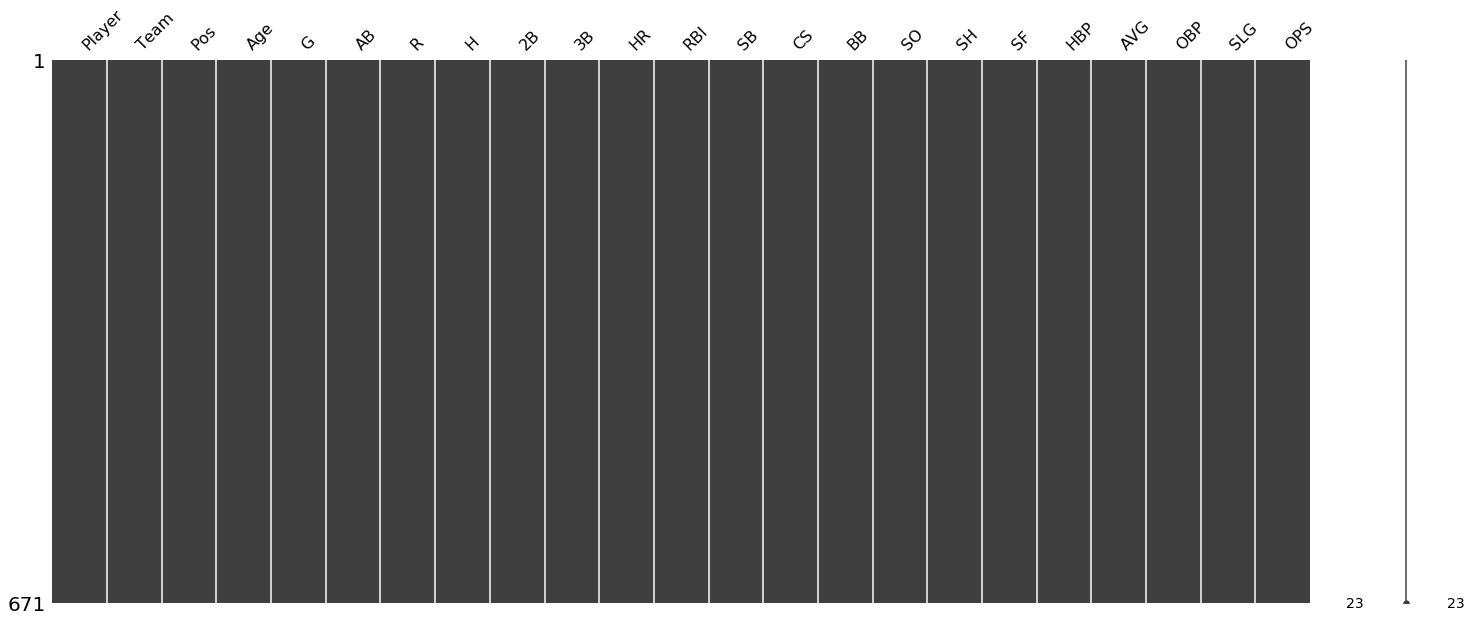

In [0]:
import matplotlib.pyplot as plt
import missingno as msng
msng.matrix(bat_10)

In [0]:
bat_10 = pd.read_csv('../MLB_data/2019_bat.csv')

In [0]:
del bat_10['Age']

In [0]:
bat_10.head()

,Player,Team,Pos,G,AB,R,H,2B,3B,HR,...,CS,BB,SO,SH,SF,HBP,AVG,OBP,SLG,OPS
0,Whit Merrifield,KC,2B,162,681,105,206,41,10,16,...,10,45,126,0,4,5,0.302,0.348,0.463,0.811
1,Marcus Semien,OAK,SS,162,657,123,187,43,7,33,...,8,87,102,0,1,2,0.285,0.369,0.522,0.891
2,Rafael Devers,BOS,3B,156,647,129,201,54,4,32,...,8,48,119,1,2,4,0.311,0.361,0.555,0.916
3,Jonathan Villar,BAL,2B,162,642,111,176,33,5,24,...,9,61,176,2,4,4,0.274,0.339,0.453,0.792
4,Ozzie Albies,ATL,2B,160,640,102,189,43,8,24,...,4,54,112,0,4,4,0.295,0.352,0.500,0.852


In [0]:
bat_10.rename(columns={"H":"TH"}, inplace=True)

In [0]:
bat_10['H']=bat_10['TH']-(bat_10['2B']+bat_10['3B']+bat_10['HR'])

In [0]:
bat_10.columns

Index(['Player', 'Team', 'Pos', 'G', 'AB', 'R', 'TH', '2B', '3B', 'HR', 'RBI',
       'SB', 'CS', 'BB', 'SO', 'SH', 'SF', 'HBP', 'AVG', 'OBP', 'SLG', 'OPS',
       'H'],
      dtype='object')

In [0]:
bat_10 =  bat_10[['Player', 'Team', 'Pos', 'G', 'AB', 'R', 'TH','H', '2B', '3B', 'HR', 'RBI',
       'SB', 'CS', 'BB', 'SO', 'SH', 'SF', 'HBP', 'AVG', 'OBP', 'SLG', 'OPS']]

In [0]:
bat_10.head()

,Player,Team,Pos,G,AB,R,TH,H,2B,3B,...,CS,BB,SO,SH,SF,HBP,AVG,OBP,SLG,OPS
0,Whit Merrifield,KC,2B,162,681,105,206,139,41,10,...,10,45,126,0,4,5,0.302,0.348,0.463,0.811
1,Marcus Semien,OAK,SS,162,657,123,187,104,43,7,...,8,87,102,0,1,2,0.285,0.369,0.522,0.891
2,Rafael Devers,BOS,3B,156,647,129,201,111,54,4,...,8,48,119,1,2,4,0.311,0.361,0.555,0.916
3,Jonathan Villar,BAL,2B,162,642,111,176,114,33,5,...,9,61,176,2,4,4,0.274,0.339,0.453,0.792
4,Ozzie Albies,ATL,2B,160,640,102,189,114,43,8,...,4,54,112,0,4,4,0.295,0.352,0.500,0.852


In [0]:
# 수정본 저장
bat_10.to_csv('../MLB_data/2019_bat.csv')

In [0]:
def save(x):
    del x['Age']
    x.rename(columns={"H":"TH"}, inplace=True)
    x['H']=x['TH']-(x['2B']+x['3B']+x['HR'])
    x=x[['Player', 'Team', 'Pos', 'G', 'AB', 'R', 'TH', 'H','2B', '3B', 'HR', 'RBI','SB', 'CS', 'BB', 'SO', 'SH', 'SF', 'HBP', 'AVG', 'OBP', 'SLG', 'OPS']]

In [0]:
# 투수 지표와 승률의 상관관계 분석

In [0]:
bat_10.columns

Index(['Player', 'Team', 'Pos', 'G', 'AB', 'R', 'TH', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'SH', 'SF', 'HBP', 'AVG', 'OBP', 'SLG',
       'OPS'],
      dtype='object')

In [0]:
a=bat_10.groupby('Team').AB.sum()
a

Team
ARI    5337
ATL    5253
BAL    5581
BOS    5749
CHC    5154
CIN    5129
CLE    5408
COL    5395
CWS    5511
DET    5526
HOU    5594
KC     5477
LAA    5140
LAD    5194
MIA    5252
MIL    5270
MIN    5718
NYM    5310
NYY    5561
OAK    5540
PHI    5300
PIT    5389
SD     5145
SEA    5481
SF     5319
STL    5175
TB     5605
TEX    5519
TOR    5477
WAS    5201
Name: AB, dtype: int64

In [0]:
b=bat_10.groupby('Team').TH.sum()
b

Team
ARI    1386
ATL    1401
BAL    1378
BOS    1553
CHC    1339
CIN    1285
CLE    1353
COL    1466
CWS    1442
DET    1329
HOU    1537
KC     1354
LAA    1257
LAD    1367
MIA    1298
MIL    1329
MIN    1547
NYM    1393
NYY    1493
OAK    1378
PHI    1335
PIT    1455
SD     1252
SEA    1304
SF     1304
STL    1298
TB     1424
TEX    1373
TOR    1297
WAS    1419
Name: TH, dtype: int64

In [0]:
b/a

Team
ARI    0.259696
ATL    0.266705
BAL    0.246909
BOS    0.270134
CHC    0.259798
CIN    0.250536
CLE    0.250185
COL    0.271733
CWS    0.261659
DET    0.240499
HOU    0.274759
KC     0.247216
LAA    0.244553
LAD    0.263188
MIA    0.247144
MIL    0.252182
MIN    0.270549
NYM    0.262335
NYY    0.268477
OAK    0.248736
PHI    0.251887
PIT    0.269994
SD     0.243343
SEA    0.237913
SF     0.245159
STL    0.250821
TB     0.254059
TEX    0.248777
TOR    0.236808
WAS    0.272832
dtype: float64